In [1]:
import numpy as np
import pandas as pd

###  Preparing X and Y data for the Model

In [2]:
path = '../vol/x.csv'

x = pd.read_csv(path)

In [3]:
x.head(1)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [4]:
y = x['worldwide_gross']

In [5]:
x = x.drop('worldwide_gross' , axis = 1)
x = x.drop('gross', axis = 1)

In [6]:
x.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [7]:
x.shape, y.shape

((4104, 7), (4104,))

## Training the Model

### Split Data in Test and Train Data

In [8]:
#Random Split of data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [9]:
print( len(x),
       len(x_train),
       len(x_test)
     )

4104 2462 1642


In [10]:
x_train.shape, x_test.shape

((2462, 7), (1642, 7))

In [11]:
 x.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


### Model Fitting

In [12]:
#Linear models import
#Lasso regression module
#object model

from sklearn.linear_model import Lasso

model = Lasso(max_iter=100000)

In [13]:
#Training
#Fitting the estimator to learn form training data x & y

model.fit(x_train , y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

##### Predictions

In [14]:
predicted = model.predict(x_test)

In [15]:
predicted , predicted.shape

(array([-2.69298255e+07,  1.27888609e+08,  2.77402546e+07, ...,
         7.97549291e+07,  1.59260749e+08,  9.03980025e+07]), (1642,))

#####  To Analize Predicted Data

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

([array([  19., 1342.,  216.,   53.,    9.,    3.,    0.,    0.,    0.,
            0.]),
  array([0.000e+00, 1.386e+03, 1.760e+02, 4.200e+01, 2.300e+01, 9.000e+00,
         3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00])],
 array([-2.91139154e+08, -5.61590157e+07,  1.78821122e+08,  4.13801260e+08,
         6.48781398e+08,  8.83761536e+08,  1.11874167e+09,  1.35372181e+09,
         1.58870195e+09,  1.82368209e+09,  2.05866222e+09]),
 <a list of 2 Lists of Patches objects>)

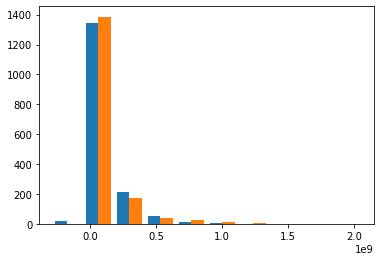

In [17]:
plt.hist([predicted, y_test])

## Performance Analisis

In [18]:
#getting the Score out of test data

#Score R^{2}

model.score(x_test, y_test)

0.5803597861019067

### Problem is to improve the Score

Warninig!!

Score is not the best metric for all the cases. 

### Method of Residues

In [19]:
residuals = y_test - predicted  #predicted = model(x_test)

In [20]:
residuals

3533    2.986224e+07
1144   -9.621799e+07
1766   -1.101278e+07
1213   -3.672394e+07
3849    1.881608e+07
            ...     
1573    7.367664e+07
2979   -2.785665e+07
2022   -5.574184e+06
840     5.348141e+07
1595   -5.900742e+07
Name: worldwide_gross, Length: 1642, dtype: float64

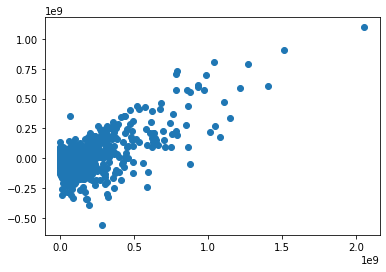

In [21]:
#Scatter of residuals

plt.scatter(y_test, residuals) #(x,y)

#####  Percentage Errors

In [22]:
#Absolute value normalized

ap_residuals = np.abs(residuals) / y_test

In [23]:
ap_residuals

3533      10.183485
1144       3.038084
1766       0.658365
1213       0.720492
3849    1241.494041
           ...     
1573       0.522920
2979      47.149364
2022       0.075143
840        0.251391
1595       1.879781
Name: worldwide_gross, Length: 1642, dtype: float64

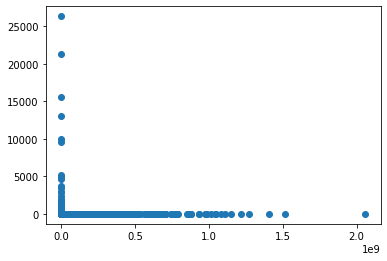

In [24]:
plt.scatter(y_test, ap_residuals)

In [25]:
#Visualised in Log scale

lap_residuals = np.log(ap_residuals)

In [26]:
lap_residuals

3533    2.320767
1144    1.111227
1766   -0.417995
1213   -0.327821
3849    7.124071
          ...   
1573   -0.648327
2979    3.853321
2022   -2.588359
840    -1.380747
1595    0.631155
Name: worldwide_gross, Length: 1642, dtype: float64

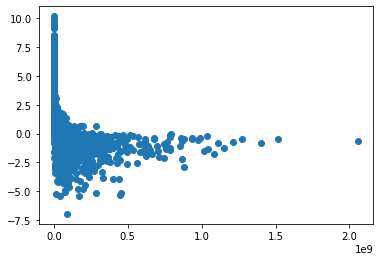

In [27]:
plt.scatter(y_test, lap_residuals)

#### Numerical Error Distributions

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


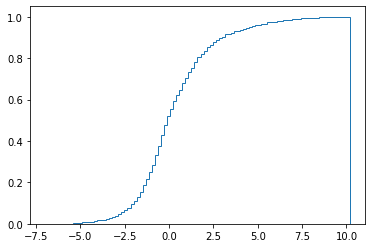

In [28]:
plt.hist(lap_residuals, bins = 100, normed = 1, histtype = 'step', cumulative = True);

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

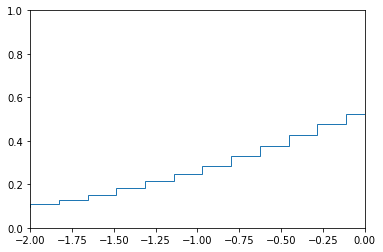

In [29]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))